In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import trange
plt.style.use(['science','grid'])
from ast import literal_eval
import json
import matplotlib as mpl


# import custom modules
import Pub
import PubCrawlFunctions as PCF
import Ant
import Logger

# import randomPubsInit

In [30]:
# velocity of an ant
velAnt = int(5000 / 60)         # 5km/h in m/min

# load the pubs
Pubs = PCF.initPubs('pubs.csv')

# set all pub popularities to 1
for pub in Pubs:
    pub.popularity *= 30

In [31]:


# Ants = loadAnt('Logs/BestPath_133.json')
Ants = Logger.loadLog('Logs/BestPath.json', velAnt)
bestAnt = Ants[-1]


In [32]:
# sum all popularities
sumPopularity = 0
for p in Pubs:
    sumPopularity += p.popularity

print('Sum of all popularities: ', sumPopularity)

Sum of all popularities:  40350


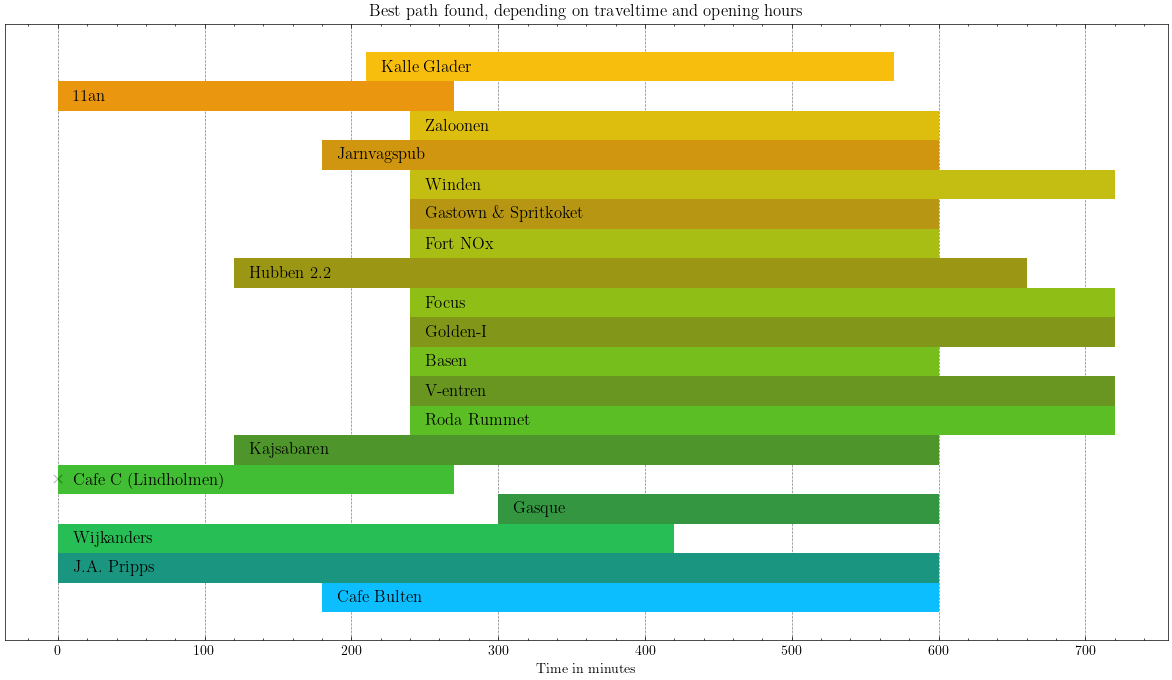

In [33]:
# create a plot where the opening hours and closing hours of the pubs are shown
# in vertical direction plot all the pubs
# in horizontal direction plot the time

# time is in minutes, the opening times are shown as recatangles

fig, ax = plt.subplots(figsize=(15, 8))

bestPath = np.array(bestAnt.timedPath)


x = bestPath[:,1]
y = bestPath[:,0] + .5
# convert to integer
# x = x.astype(int)
# y = y.astype(int)

i = 0

for p in Pubs:
    i += 1
    r = 13
    b = 255
    g = 40 * (i % 2) + 150

    # use different color for each pub
    # plot the opening times
    ax.broken_barh([(p.openingTime, p.closingTime - p.openingTime)], (p.pubID, 1), facecolors=[i*r/255,g/255,b/i/255])
    ax.plot(x, y, marker='x', markeredgecolor='black', markeredgewidth=0.01, linestyle='-', color='black', linewidth=0.5)
    # place a text with the pubName

    # label the bars on the y-axis with their name which comes as a string pubName
    # make it bolt and italic

    ax.text(p.openingTime +10, p.pubID + .5, p.pubName, fontsize=12, fontstyle='oblique', verticalalignment='center', horizontalalignment='left', color='black')
    #ax.text(p.openingTime + 15, p.pubID + .5, p.pubName, verticalalignment='center', horizontalalignment='left', color='black', usetex = True)

    # ax.text(p.openingTime + 15, p.pubID + .5, p.pubName, style='italic', fontsize=8,
    #     bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

    
plt.xticks(np.arange(0, 780, 60), ('15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00','22:00','23:00','00:00','01:00','02:00','03:00'))

# label the bars on the y-axis with their name which comes as a string pubName

plt.xlabel('Time in minutes')
plt.yticks([])
plt.title('Best path found, depending on traveltime and opening hours')
plt.grid('on')

# save the figure
plt.savefig('WaitingTimes_BestPath.svg', format='svg')
plt.show()

[[4 0]]


(0.0, 720.0)

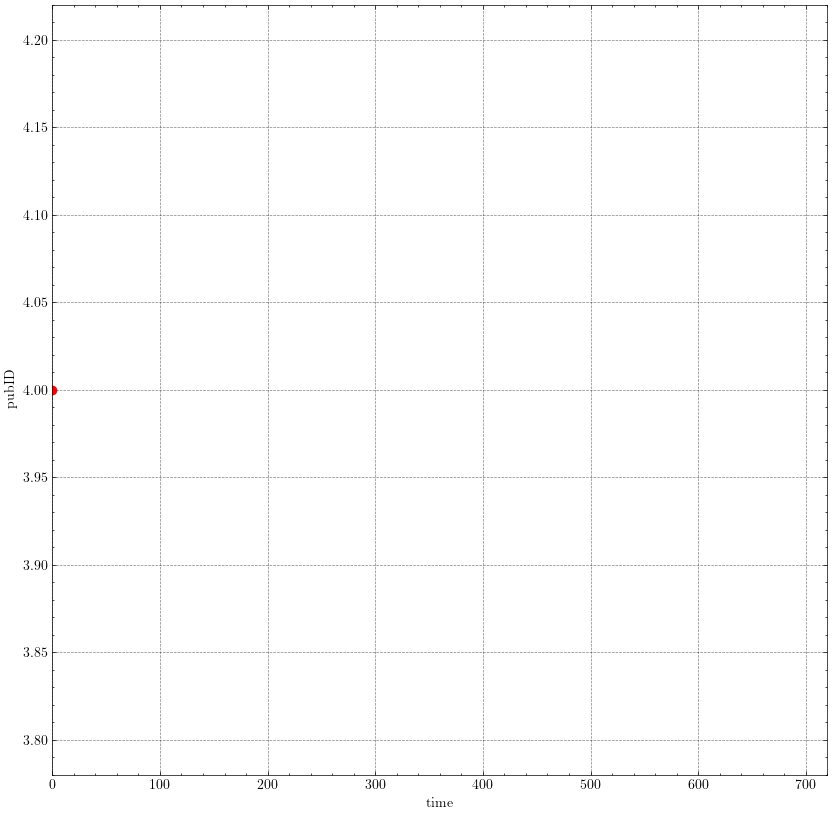

In [34]:
# scatter plot to show the trajectory of the best ant over time, x-> time y-> pubID
fig, ax = plt.subplots(figsize=(10, 10))

bestPath = np.array(bestAnt.timedPath)

x = bestPath[:,1]
y = bestPath[:,0]
# convert to integer
x = x.astype(int)
y = y.astype(int)

print(bestPath)


ax.plot(x, y, c='r', marker="o")
ax.set_xlabel('time')
ax.set_ylabel('pubID')
ax.set_xlim(0, 720)

In [35]:
travelTimeMatrix = np.ones((19,19))
distanceMatrix = np.ones((19,19)) * 12.65
for i in range(len(travelTimeMatrix)):
    for j in range(len(travelTimeMatrix)):
        # coloum 4 and 17 AND row 4 and 17 are divided by 12.65, except [4,17] and [17,4] which are divided by 83.3, the rest is divided by 83.3
        if (i == 4 or j == 4 or i == 17 or j == 17) and (i != j):
            travelTimeMatrix[i][j] = distanceMatrix[i][j] / 12.65
        elif (i != j):
            travelTimeMatrix[i][j] = distanceMatrix[i][j] / 83.3

travelTimeMatrix[4,17] = distanceMatrix[4,17] / 83.3
travelTimeMatrix[17,4] = distanceMatrix[17,4] / 83.3


print(travelTimeMatrix)

[[1.         0.15186074 0.15186074 0.15186074 1.         0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 1.
  0.15186074]
 [0.15186074 1.         0.15186074 0.15186074 1.         0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 1.
  0.15186074]
 [0.15186074 0.15186074 1.         0.15186074 1.         0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 1.
  0.15186074]
 [0.15186074 0.15186074 0.15186074 1.         1.         0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 0.15186074
  0.15186074 0.15186074 0.15186074 0.15186074 0.15186074 1.
  0.15186074]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   